# HEART DISEASE PREDICTION

### - Shubham Yedekar

Initially we import all the required libraries for our case study.

In [165]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from numpy import percentile, mean, std
from scipy.stats import f_oneway, ttest_ind
from math import pi

# Sklearn imports
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    mean_squared_error, r2_score, roc_auc_score, roc_curve, auc,
    confusion_matrix, classification_report, RocCurveDisplay
)
from sklearn.pipeline import Pipeline
from sklearn import metrics

# Bokeh imports (with error handling for pandas_bokeh)
try:
    import pandas_bokeh
except ModuleNotFoundError:
    print("pandas_bokeh is not installed. Proceeding without it.")
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import ColumnDataSource, HoverTool, CategoricalColorMapper, Tabs, Panel  # Updated import location
from bokeh.layouts import row, column, gridplot
from bokeh.palettes import Category20c, Spectral6
from bokeh.transform import cumsum

# Enable notebook output for Bokeh
output_notebook()


pandas_bokeh is not installed. Proceeding without it.


Loading BokehJS ...

Loading the dataset into a DataFrame and creating a copy for future use.

In [168]:
df = pd.read_csv('/Users/disastershubz/Documents/Heart disease prediction/cardiac_data.csv')
df_copy = df.copy()

## Data Pre-processing

In the data pre-processing step, we analyzed the dataset to understand its structure, including the variables, their types, and the overall shape of the dataframe.

In [172]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [174]:
df.shape

(303, 14)

We have 14 columns and 303 rows.

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### The dataset includes the following features, with the target variable indicating the presence of heart disease:

- **age**: Age in years
- **sex**: Gender (1 = male; 0 = female)
- **cp**: Chest pain type
- **trestbps**: Resting blood pressure (mm Hg on hospital admission)
- **chol**: Serum cholesterol level (mg/dl)
- **fbs**: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- **restecg**: Resting electrocardiographic results
- **thalach**: Maximum heart rate achieved
- **exang**: Exercise-induced angina (1 = yes; 0 = no)
- **oldpeak**: ST depression induced by exercise relative to rest
- **slope**: Slope of the peak exercise ST segment
- **ca**: Number of major vessels (0-3) colored by fluoroscopy
- **thal**: Thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect)
- **target**: Heart disease diagnosis (1 = yes, 0 = no)


### Handling missing values

In [469]:
df.isnull().sum()

age                          0
resting_blood_pressure       0
cholesterol                  0
max_heart_rate_achieved      0
st_depression                0
num_major_vessels            0
target                       0
sex_1                        0
chest_pain_type_1            0
chest_pain_type_2            0
chest_pain_type_3            0
fasting_blood_sugar_1        0
rest_ecg_1                   0
rest_ecg_2                   0
exercise_induced_angina_1    0
st_slope_1                   0
st_slope_2                   0
thalassemia_1                0
thalassemia_2                0
thalassemia_3                0
dtype: int64

We can see that all the columns are filled and there are no null values in our dataset.

In [184]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [186]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Some Insights:
    1. The age of all people in this dataset is from 29 to 77. 
    2. The average resting blood pressure is around 132.
    3. Cholestrol measure varies from 126 to 564 with an average value of around 246.


In [189]:
df.columns = df.columns.str.replace(' ','_')

In [191]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [193]:
# Making sure if any duplicatd values.
df.duplicated().sum()

1

In [195]:
df.drop_duplicates(inplace = True)

In [197]:
df.duplicated().sum()

0

There was one duplicate row and we removed it. Now we have our dataframe cleaned with no duplicates.

In [200]:
## Missing value

In [202]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Outlier detection

In [205]:
data = df['age']

In [207]:
q25, q75 = percentile(data, 25), percentile(data, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Percentiles: 25th=48.000, 75th=61.000, IQR=13.000
Identified outliers: 0
Non-outlier observations: 302


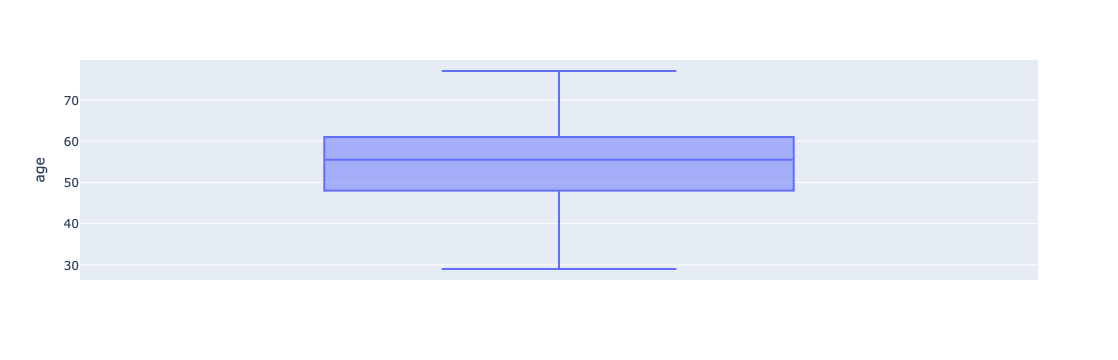

In [209]:
fig = px.box(df, y="age")
fig.show()

There are no outliers in this data, allowing us to proceed with the next steps.

### Correlation Analysis

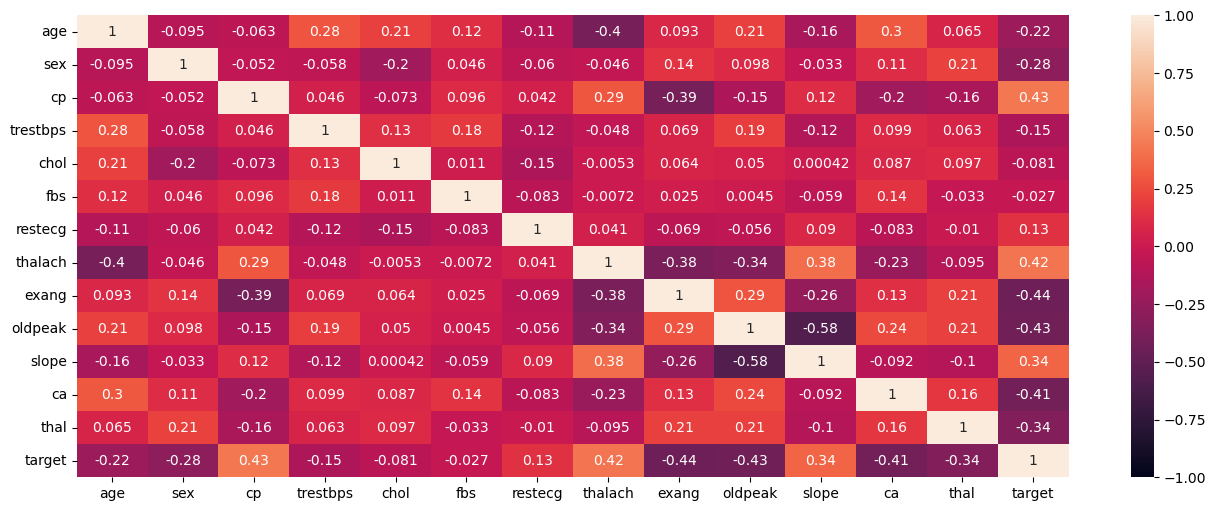

In [213]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

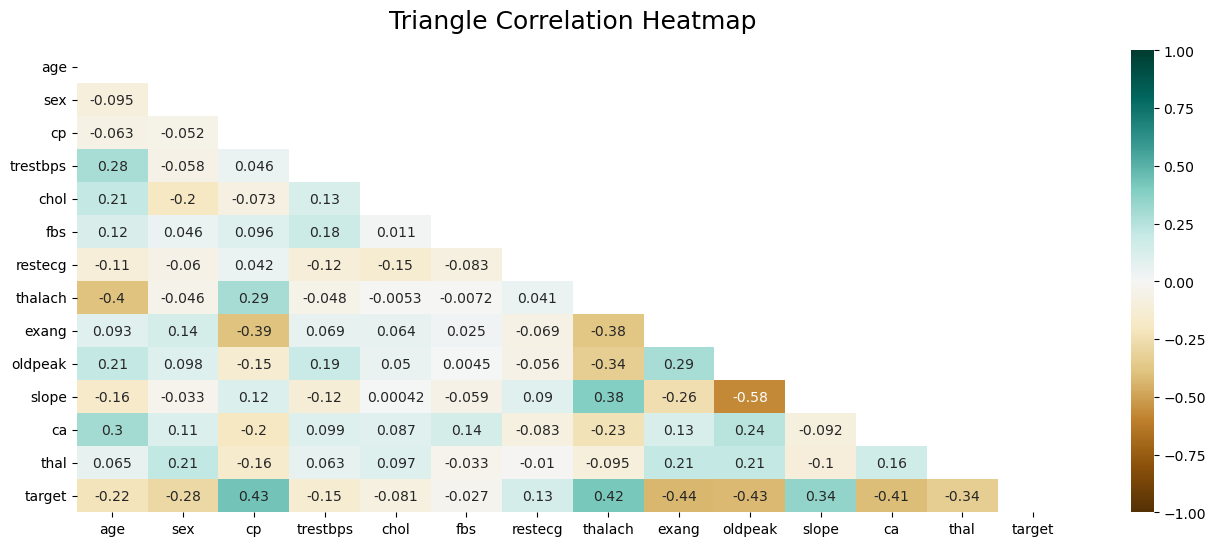

In [215]:
plt.figure(figsize=(16, 6))

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Create a heatmap with the mask applied
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

# Set title and formatting
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

# Show the plot
plt.show()


Here, we notice that the variables 'oldpeak' and 'slope' show the strongest negative correlation. Similarly, the 'target' variable is positively correlated with 'chest pain'. This correlation helps to understand why chest pain is a significant indicator for determining whether an individual may have heart disease.

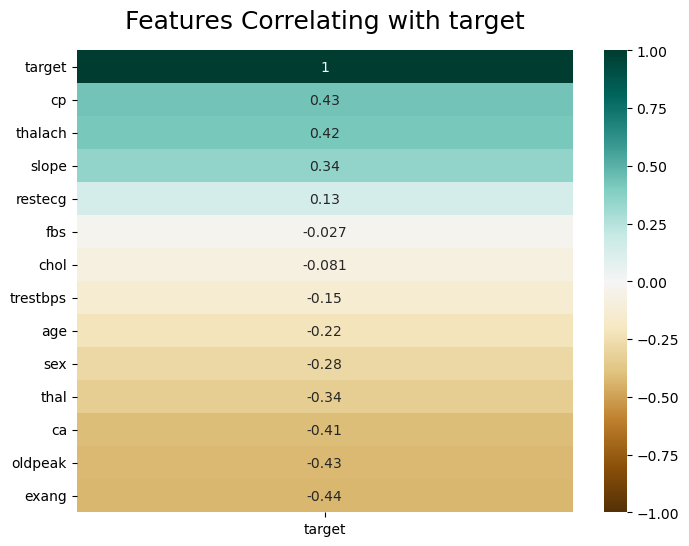

In [218]:
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(df.corr()[['target']].sort_values(by='target', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with target', fontdict={'fontsize':18}, pad=16);

We are examining the key variables that have significant relationships with or influence on the target outcome.

### Dummy variables

In [222]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [224]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [226]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [228]:
df['sex'] = df['sex'].astype('object')
df['chest_pain_type'] = df['chest_pain_type'].astype('object')
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].astype('object')
df['rest_ecg'] = df['rest_ecg'].astype('object')
df['exercise_induced_angina'] = df['exercise_induced_angina'].astype('object')
df['st_slope'] = df['st_slope'].astype('object')
df['thalassemia'] = df['thalassemia'].astype('object')

We transformed all categorical variables into the object data type, enabling straightforward application of dummy encoding for subsequent machine learning tasks.

In [231]:
df.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia                 object
target                       int64
dtype: object

In [233]:
df = pd.get_dummies(df, drop_first=True)

In [235]:
df.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_1,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,fasting_blood_sugar_1,rest_ecg_1,rest_ecg_2,exercise_induced_angina_1,st_slope_1,st_slope_2,thalassemia_1,thalassemia_2,thalassemia_3
0,63,145,233,150,2.3,0,1,True,False,False,True,True,False,False,False,False,False,True,False,False
1,37,130,250,187,3.5,0,1,True,False,True,False,False,True,False,False,False,False,False,True,False
2,41,130,204,172,1.4,0,1,False,True,False,False,False,False,False,False,False,True,False,True,False
3,56,120,236,178,0.8,0,1,True,True,False,False,False,True,False,False,False,True,False,True,False
4,57,120,354,163,0.6,0,1,False,False,False,False,False,True,False,True,False,True,False,True,False


As we can see this is the final dataframe which is clean and completely proccessed.

In [238]:
scaler = MinMaxScaler()

# fit and transform the data
df_normalized  = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df_normalized 

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_1,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,fasting_blood_sugar_1,rest_ecg_1,rest_ecg_2,exercise_induced_angina_1,st_slope_1,st_slope_2,thalassemia_1,thalassemia_2,thalassemia_3
0,0.708333,0.481132,0.244292,0.603053,0.370968,0.00,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,0.339623,0.283105,0.885496,0.564516,0.00,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.250000,0.339623,0.178082,0.770992,0.225806,0.00,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.562500,0.245283,0.251142,0.816794,0.129032,0.00,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.583333,0.245283,0.520548,0.702290,0.096774,0.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.583333,0.433962,0.262557,0.396947,0.032258,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
298,0.333333,0.150943,0.315068,0.465649,0.193548,0.00,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
299,0.812500,0.471698,0.152968,0.534351,0.548387,0.50,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
300,0.583333,0.339623,0.011416,0.335878,0.193548,0.25,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


This is the dataset we get after scaling.

## PCA

In [242]:
### WITHOUT NORMALIZATION

In [244]:
pcs = PCA(n_components=2)
pcs.fit(df[["cholesterol", "max_heart_rate_achieved"]])

PCA(n_components=2)

In [246]:
pcsSummary = pd.DataFrame({"Standard deviation":np.sqrt(pcs.explained_variance_),"Proportion of variance": pcs.explained_variance_ratio_,
"Cumulative proportion": np.cumsum(pcs.explained_variance_ratio_)})

In [248]:
pcsSummary

,Standard deviation,Proportion of variance,Cumulative proportion
0,51.753666,0.83623,0.83623
1,22.903126,0.16377,1.00000


Principal axis 0 captures 84% of the variance, while PC1 accounts for 16%. Consequently, if we omit PC1, we would still retain 84% of the total variance.

In [251]:
pcsSummary= pcsSummary.transpose()
pcsSummary

,0,1
Standard deviation,51.753666,22.903126
Proportion of variance,0.836230,0.163770
Cumulative proportion,0.836230,1.000000


In [253]:
pcsSummary.columns = ["PC1", "PC2"]
pcsSummary.columns

Index(['PC1', 'PC2'], dtype='object')

In [255]:
pcsSummary.round(4)

,PC1,PC2
Standard deviation,51.7537,22.9031
Proportion of variance,0.8362,0.1638
Cumulative proportion,0.8362,1.0000


In [257]:
pcs.components_


array([[ 0.99999573, -0.00292141],
       [-0.00292141, -0.99999573]])

In [259]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=["PC1","PC2"],index=["cholesterol", "max_heart_rate_achieved"])
pcsComponents_df

,PC1,PC2
cholesterol,0.999996,-0.002921
max_heart_rate_achieved,-0.002921,-0.999996


In [261]:
scores = pd.DataFrame(pcs.transform(df[["cholesterol", "max_heart_rate_achieved"]]),columns=["PC1", "PC2"])
scores

,PC1,PC2
0,-13.501200,-0.391023
1,3.390635,-37.440529
2,-42.565347,-22.306208
3,-10.583012,-28.399667
4,107.460305,-13.744458
...,...,...
297,-5.422356,26.585491
298,17.551253,17.518337
299,-53.474737,8.725795
300,-115.398515,34.906811


Weights are utilized to calculate principal component scores, which represent the projected values of calories and rating onto new axes after mean subtraction. The PCS object’s transform method is employed to derive these scores from the original data. The first column represents the projection onto the first principal component, z1, using the weights (0.999996, -0.002921). The second column represents the projection onto the second principal component, z2, with the weights (-0.002921, 0.999996).

In [264]:
pcs = PCA()

In [266]:
cc = df.iloc[:,0 : 5]
cc

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
298,57,140,241,123,0.2
299,45,110,264,132,1.2
300,68,144,193,141,3.4
301,57,130,131,115,1.2


In [268]:
cc = df.iloc[:,0 : 5].dropna(axis=0)
cc.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


In [270]:
pcs.fit(cc)

PCA()

In [272]:
pcsSummary_df = pd.DataFrame({"Std devn":np.sqrt(pcs.explained_variance_),"Proportion of var": pcs.explained_variance_ratio_,
"Cum proportion": np.cumsum(pcs.explained_variance_ratio_)})

In [274]:
pcsSummary_df 

,Std devn,Proportion of var,Cum proportion
0,51.843052,0.747688,0.747688
1,23.279494,0.150760,0.898448
2,17.483253,0.085032,0.983481
3,7.631231,0.016201,0.999681
4,1.070531,0.000319,1.000000


In [276]:
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df

,0,1,2,3,4
Std devn,51.843052,23.279494,17.483253,7.631231,1.070531
Proportion of var,0.747688,0.150760,0.085032,0.016201,0.000319
Cum proportion,0.747688,0.898448,0.983481,0.999681,1.000000


In [278]:
pcsSummary_df.columns = ["PC{}".format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]

In [280]:
pcsSummary_df.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], dtype='object')

In [282]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(),columns=pcsSummary_df.columns,index=df.iloc[:,0 : 5].columns)


In [284]:
pcsComponents_df.iloc[:,0 : 5]

,PC1,PC2,PC3,PC4,PC5
age,0.038154,0.181045,0.126326,0.974576,-0.003281
resting_blood_pressure,0.048524,0.107827,0.981646,-0.149211,-0.011218
cholesterol,0.998081,-0.016872,-0.051929,-0.029211,-0.000490
max_heart_rate_achieved,-0.004787,-0.977237,0.132783,0.164571,0.016454
st_depression,0.001237,0.017879,0.009218,-0.001198,0.999796


In [286]:
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5
Std devn,51.8431,23.2795,17.4833,7.6312,1.0705
Proportion of var,0.7477,0.1508,0.0850,0.0162,0.0003
Cum proportion,0.7477,0.8984,0.9835,0.9997,1.0000


The table above displays the outcomes of applying Principal Component Analysis (PCA) to five numerical variables. Notably, the first three components explain over 98% of the total variance found within the original five variables. This indicates that we can encapsulate the majority of the data's variability using fewer than 25% of the initial dimensions. Specifically, the first two principal components alone account for 90% of the total variance. It's important to note, however, that these findings are affected by the scales of the variables involved.

In [289]:
pcv = PCA(n_components=.90)
pcv.fit(df.iloc[:,0 : 5])
print(pcv.components_)

[[ 0.03815406  0.04852382  0.99808079 -0.00478654  0.00123724]
 [ 0.18104512  0.10782741 -0.01687189 -0.97723672  0.01787882]
 [ 0.12632589  0.98164607 -0.05192856  0.13278255  0.00921827]]


Out of initial dataframe of 5 variables, only 2 are enough to maintain 90% information.

### After Normalization

In [295]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale  # Import the scale function
import numpy as np

# Assuming cc is your dataset
pcs = PCA()

# Perform PCA on the scaled data
pcs.fit(scale(cc))  # Use the scale function to standardize the data


PCA()

In [297]:
pcsSummary_df = pd.DataFrame({"Std devn":np.sqrt(pcs.explained_variance_),"Proportion of var": pcs.explained_variance_ratio_,
"Cum proportion": np.cumsum(pcs.explained_variance_ratio_)})

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ["PC{}".format(i) for i in range(1,len(pcsSummary_df.columns) + 1)]

pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5
Std devn,1.3442,1.0419,0.9391,0.8751,0.6903
Proportion of var,0.3602,0.2164,0.1758,0.1526,0.0950
Cum proportion,0.3602,0.5766,0.7524,0.9050,1.0000


In [299]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(),
columns=pcsSummary_df.columns,
index=df.iloc[:,0 : 5].columns)
pcsComponents_df.iloc[:,0 : 5]

,PC1,PC2,PC3,PC4,PC5
age,-0.566954,0.109079,0.181646,-0.521258,-0.601632
resting_blood_pressure,-0.382188,0.419822,-0.734912,-0.146078,0.340951
cholesterol,-0.239179,0.695729,0.529170,0.382641,0.179777
max_heart_rate_achieved,0.504897,0.480770,-0.310520,0.164465,-0.624875
st_depression,-0.469434,-0.310923,-0.224646,0.730403,-0.314648


We have determined that four principal components are necessary to capture more than 90% of the total variability. Using only the first two principal components, we account for 58% of the variability, suggesting that reducing the number of variables to two would result in significant information loss. Analysis of the weights reveals that the first principal component is essentially a contrast between two groups of variables: (1) age, resting blood pressure, cholesterol, and st_depression (which all have large negative weights) versus (2) max heart rate achieved (which has a large positive weight). High values on this principal component indicate lower contributions from st_depression and higher contributions from max heart rate achieved. This aligns with findings that lower st_depression is often associated with heart disease. The second principal component is primarily influenced by cholesterol, while the third is driven by resting blood pressure.

## Classification

In [303]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
# Used for classification of dataset.
def classif_results(): 
  conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
  print('Confusion matrix:\n', conf_mat)

  labels = ['Class 0', 'Class 1']
  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
  fig.colorbar(cax)
  ax.set_xticklabels([''] + labels)
  ax.set_yticklabels([''] + labels)
  plt.xlabel('Predicted')
  plt.ylabel('Expected')
  plt.show()

  print("Accuracy", metrics.accuracy_score(y_test, y_pred))

  from sklearn.metrics import classification_report
  print(classification_report(y_test, y_pred))

  
  auc = roc_auc_score(y_test, y_pred)
  print("AUC Score: ")
  print(auc)

  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  plot_roc_curve(fpr, tpr)

A function is defined to carry out all the calssification operation and plot roc auc scores and graphs.

<Axes: ylabel='count'>

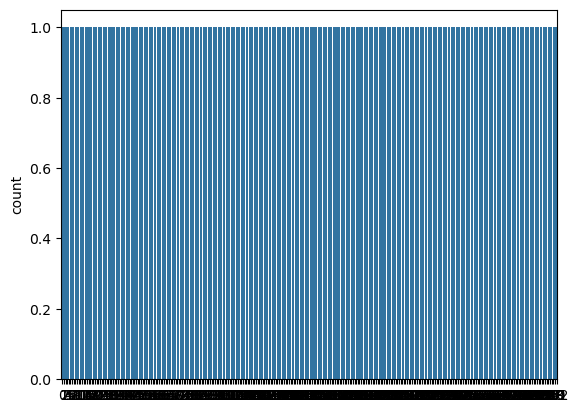

In [306]:
sns.countplot(df['target'])

In [307]:
X = df.drop(['target'],axis=1).values
y = df['target'].values

In [310]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
# Used for classification of dataset.
def classif_results(): 
  conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
  print('Confusion matrix:\n', conf_mat)

  labels = ['Class 0', 'Class 1']
  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
  fig.colorbar(cax)
  ax.set_xticklabels([''] + labels)
  ax.set_yticklabels([''] + labels)
  plt.xlabel('Predicted')
  plt.ylabel('Expected')
  plt.show()

  print("Accuracy", metrics.accuracy_score(y_test, y_pred))

  from sklearn.metrics import classification_report
  print(classification_report(y_test, y_pred))

  
  auc = roc_auc_score(y_test, y_pred)
  print("AUC Score: ")
  print(auc)

  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  plot_roc_curve(fpr, tpr)


We plan to implement Stratified K-fold cross-validation with 10 folds as our strategy to prevent overfitting during our machine learning classification tasks.

In [313]:
## Naive Bayes

In [315]:
skf = StratifiedKFold(n_splits=10 )
scores = []
rocScores = []


model = GaussianNB()
i = 0

for train_index,test_index in skf.split(X,y):
    i = i + 1

    X_train, X_test =  X[list(train_index)], X[list(test_index)]
    y_train, y_test = y[list(train_index)], y[list(test_index)]
    

    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = metrics.accuracy_score(y_test,y_pred)
    scores.append(score)   
    rocScore = roc_auc_score(y_test, y_pred)
    rocScores.append(rocScore)
   

mean_acc_score = np.array(scores).mean()
mean_roc_score = np.array(rocScores).mean()

print('The Accuracy scores are: \n',scores)

print('The ROC scores are: \n',rocScores)
print('The mean accuracy score is:',mean_acc_score)
print('The mean ROC score is:',mean_roc_score)

The Accuracy scores are: 
 [0.8387096774193549, 0.8387096774193549, 0.9, 0.9, 0.8, 0.8333333333333334, 0.8666666666666667, 0.7666666666666667, 0.6666666666666666, 0.8]
The ROC scores are: 
 [0.8340336134453781, 0.8340336134453781, 0.8936651583710407, 0.9117647058823529, 0.7991071428571428, 0.84375, 0.8616071428571429, 0.7544642857142856, 0.65625, 0.7991071428571428]
The mean accuracy score is: 0.8210752688172043
The mean ROC score is: 0.8187782805429864


Confusion matrix:
 [[11  3]
 [ 3 13]]


/var/folders/g4/nw3tvq1j6q7c8jjlxwf19c5c0000gn/T/ipykernel_3292/1126036334.py:20: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/g4/nw3tvq1j6q7c8jjlxwf19c5c0000gn/T/ipykernel_3292/1126036334.py:21: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



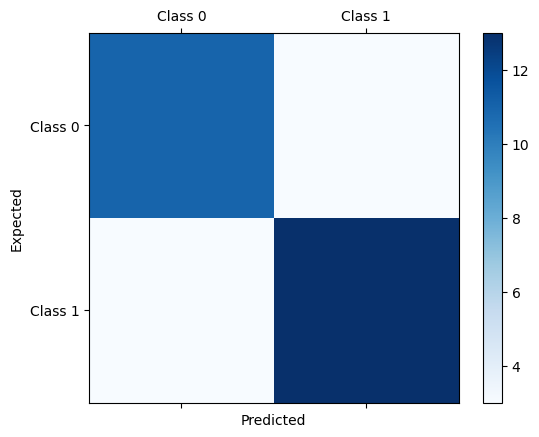

Accuracy 0.8
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.81      0.81      0.81        16

    accuracy                           0.80        30
   macro avg       0.80      0.80      0.80        30
weighted avg       0.80      0.80      0.80        30

AUC Score: 
0.7991071428571428


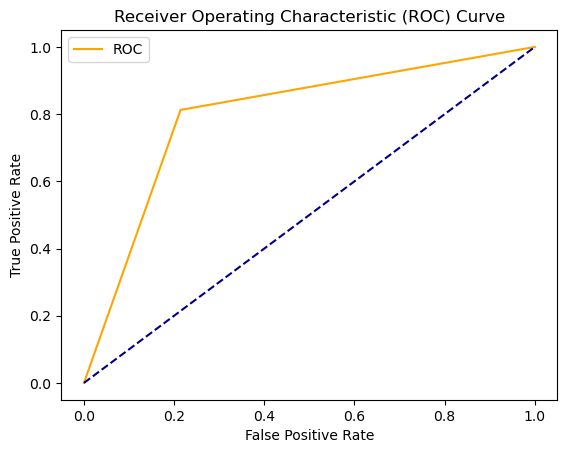

In [317]:
classifier = GaussianNB()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)


classif_results()

In [319]:
# Logistic

In [321]:
skf = StratifiedKFold(n_splits=10)
scores = []
rocScores = []


model = LogisticRegression()
i = 0

for train_index,test_index in skf.split(X,y):
    i = i + 1
    X_train, X_test =  X[list(train_index)], X[list(test_index)]
    y_train, y_test = y[list(train_index)], y[list(test_index)]

    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = metrics.accuracy_score(y_test,y_pred)
    scores.append(score)   
    rocScore = roc_auc_score(y_test, y_pred)
    rocScores.append(rocScore)


mean_acc_score = np.array(scores).mean()
mean_roc_score = np.array(rocScores).mean()



print('The Accuracy scores are: \n',scores)
print('The mean accuracy score is:',mean_acc_score)

print('The ROC scores are: \n',rocScores)
print('The mean ROC score is:',mean_roc_score)

The Accuracy scores are: 
 [0.9032258064516129, 0.8709677419354839, 0.8333333333333334, 0.9, 0.8666666666666667, 0.7666666666666667, 0.9, 0.8333333333333334, 0.7333333333333333, 0.7666666666666667]
The mean accuracy score is: 0.8374193548387098
The ROC scores are: 
 [0.8928571428571428, 0.8634453781512604, 0.8257918552036198, 0.9027149321266968, 0.8616071428571429, 0.7767857142857143, 0.8973214285714286, 0.8258928571428571, 0.7232142857142857, 0.7678571428571428]
The mean ROC score is: 0.8337487879767291


Confusion matrix:
 [[11  3]
 [ 4 12]]


/var/folders/g4/nw3tvq1j6q7c8jjlxwf19c5c0000gn/T/ipykernel_3292/1126036334.py:20: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/g4/nw3tvq1j6q7c8jjlxwf19c5c0000gn/T/ipykernel_3292/1126036334.py:21: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



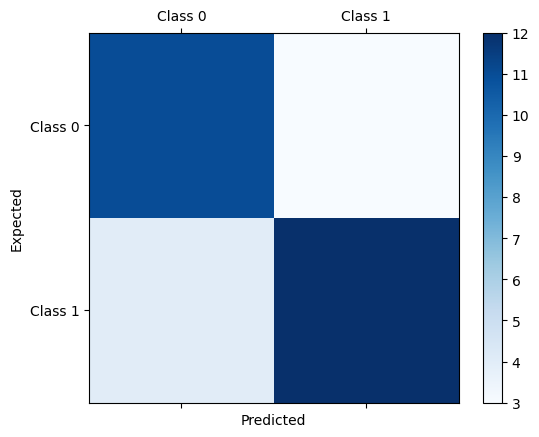

Accuracy 0.7666666666666667
              precision    recall  f1-score   support

           0       0.73      0.79      0.76        14
           1       0.80      0.75      0.77        16

    accuracy                           0.77        30
   macro avg       0.77      0.77      0.77        30
weighted avg       0.77      0.77      0.77        30

AUC Score: 
0.7678571428571428


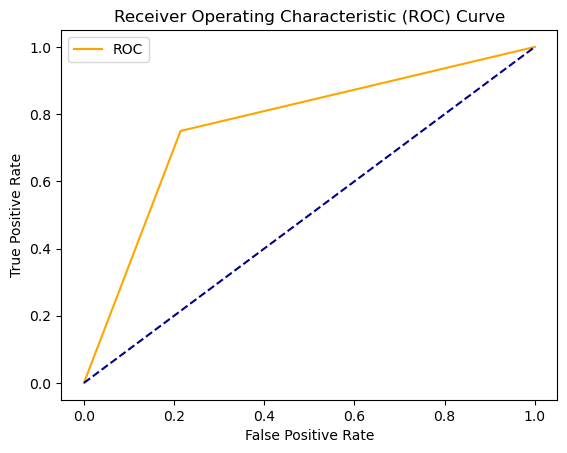

In [323]:

classifier = LogisticRegression()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)


classif_results()

In [325]:
### knn

Minimum error:- 0.1 at K = 3


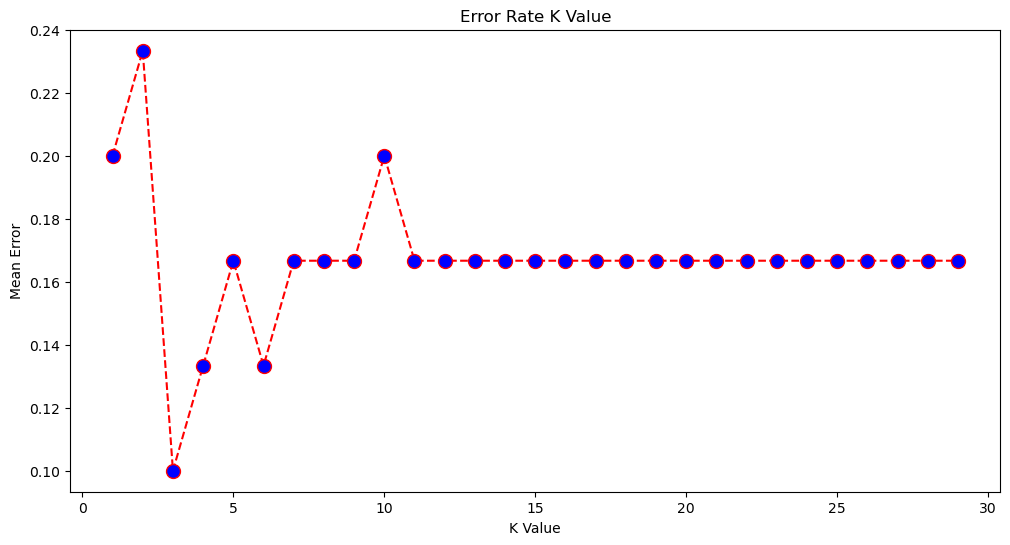

In [327]:
error = []
# Calculating error for K values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

In [329]:
skf = StratifiedKFold(n_splits=10)
scores = []
rocScores = []


model = KNeighborsClassifier(n_neighbors=3)
i = 0

for train_index,test_index in skf.split(X,y):
    i = i + 1
    X_train, X_test =  X[list(train_index)], X[list(test_index)]
    y_train, y_test = y[list(train_index)], y[list(test_index)]

    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = metrics.accuracy_score(y_test,y_pred)
    scores.append(score)   
    rocScore = roc_auc_score(y_test, y_pred)
    rocScores.append(rocScore)


mean_acc_score = np.array(scores).mean()
mean_roc_score = np.array(rocScores).mean()



print('The Accuracy scores are: \n',scores)
print('The mean accuracy score is:',mean_acc_score)

print('The ROC scores are: \n',rocScores)
print('The mean ROC score is:',mean_roc_score)

The Accuracy scores are: 
 [0.8064516129032258, 0.7096774193548387, 0.7, 0.8666666666666667, 0.8, 0.8333333333333334, 0.8666666666666667, 0.7333333333333333, 0.7333333333333333, 0.9]
The mean accuracy score is: 0.7949462365591399
The ROC scores are: 
 [0.7920168067226889, 0.7163865546218486, 0.6900452488687784, 0.8823529411764706, 0.7991071428571428, 0.8348214285714286, 0.8660714285714286, 0.7276785714285714, 0.7276785714285714, 0.9017857142857143]
The mean ROC score is: 0.7937944408532643


Confusion matrix:
 [[13  1]
 [ 2 14]]


/var/folders/g4/nw3tvq1j6q7c8jjlxwf19c5c0000gn/T/ipykernel_3292/1126036334.py:20: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/g4/nw3tvq1j6q7c8jjlxwf19c5c0000gn/T/ipykernel_3292/1126036334.py:21: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



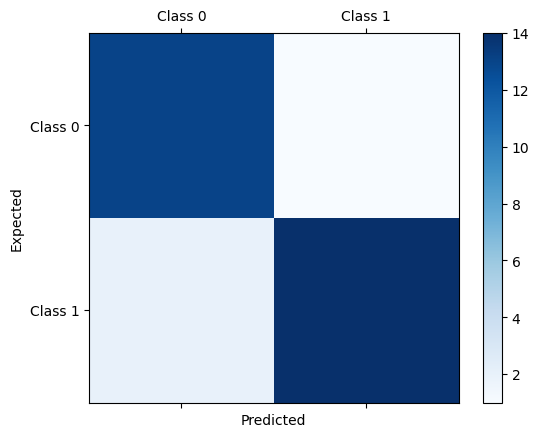

Accuracy 0.9
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.93      0.88      0.90        16

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

AUC Score: 
0.9017857142857143


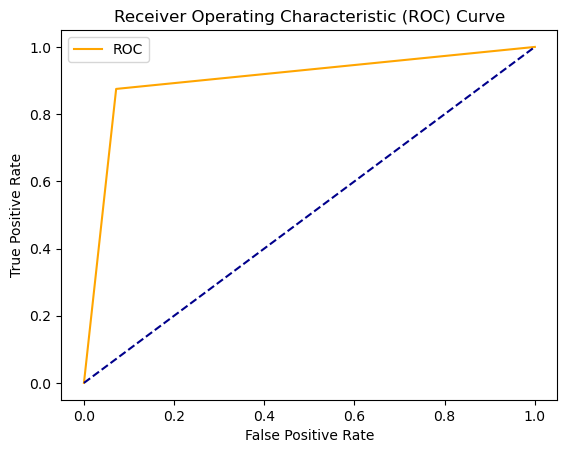

In [331]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)


classif_results()

In [333]:
# decesion tree

In [343]:
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import roc_auc_score
import numpy as np

# Assuming X and y are your features and target variables
skf = StratifiedKFold(n_splits=10)
scores = []
rocScores = []

# Initialize the DecisionTreeClassifier
model = DecisionTreeClassifier()

i = 0
for train_index, test_index in skf.split(X, y):
    i += 1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Standardize the data
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)

    # Train the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate accuracy and ROC AUC score
    score = metrics.accuracy_score(y_test, y_pred)
    scores.append(score)
    
    rocScore = roc_auc_score(y_test, y_pred)
    rocScores.append(rocScore)

# Calculate mean scores
mean_acc_score = np.array(scores).mean()
mean_roc_score = np.array(rocScores).mean()

# Print the results
print('The Accuracy scores are: \n', scores)
print('The mean accuracy score is:', mean_acc_score)
print('The ROC scores are: \n', rocScores)
print('The mean ROC score is:', mean_roc_score)


The Accuracy scores are: 
 [0.7419354838709677, 0.6774193548387096, 0.7333333333333333, 0.8, 0.7, 0.7333333333333333, 0.6666666666666666, 0.8, 0.6666666666666666, 0.8333333333333334]
The mean accuracy score is: 0.735268817204301
The ROC scores are: 
 [0.7331932773109243, 0.680672268907563, 0.7194570135746606, 0.8054298642533937, 0.6964285714285714, 0.7410714285714286, 0.6696428571428572, 0.7857142857142857, 0.6651785714285714, 0.8258928571428571]
The mean ROC score is: 0.7322680995475113


In [347]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Initialize the classifier
classifier = DecisionTreeClassifier()

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:\n", cm)

# You can calculate other metrics if needed, for example:
from sklearn.metrics import accuracy_score, classification_report

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Classification report


Confusion Matrix:
 [[10  4]
 [ 2 14]]

Accuracy: 0.8


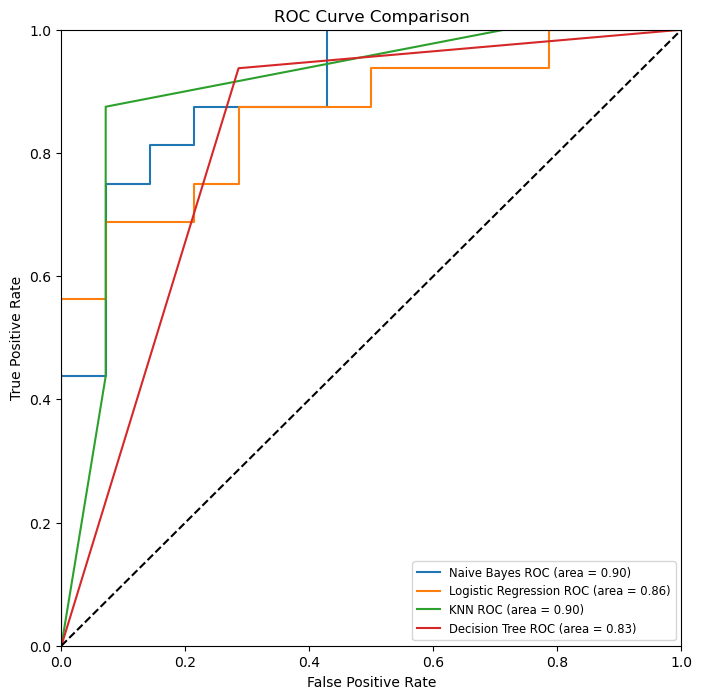

In [353]:
# Necessary imports
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define models
lr_model = LogisticRegression()
knn_model = KNeighborsClassifier(n_neighbors=3)
nb_model = GaussianNB()
des_model = DecisionTreeClassifier()

models = [
    {
        'label': 'Naive Bayes',
        'model': nb_model
    },
    {
        'label': 'Logistic Regression',
        'model': lr_model
    },
    {
        'label': 'KNN',
        'model': knn_model
    },
    {
        'label': 'Decision Tree',
        'model': des_model
    }
]

plt.figure(figsize=(8, 8))

# Loop through each model and plot the ROC curve
for m in models:
    # Fit the model and get predicted probabilities
    probas = m['model'].fit(X_train, y_train).predict_proba(X_test)
    
    # Compute ROC curve and area under the curve (AUC)
    fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], roc_auc))

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right', fontsize='small')
plt.title('ROC Curve Comparison')
plt.show()


Naive Bayes and KNN seems to work well for classifcation here.

In [356]:
## Bagging

In [358]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [360]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8333333333333334


In [362]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.8333333333333334


Confusion matrix:
 [[11  3]
 [ 2 14]]


/var/folders/g4/nw3tvq1j6q7c8jjlxwf19c5c0000gn/T/ipykernel_3292/1126036334.py:20: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/g4/nw3tvq1j6q7c8jjlxwf19c5c0000gn/T/ipykernel_3292/1126036334.py:21: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



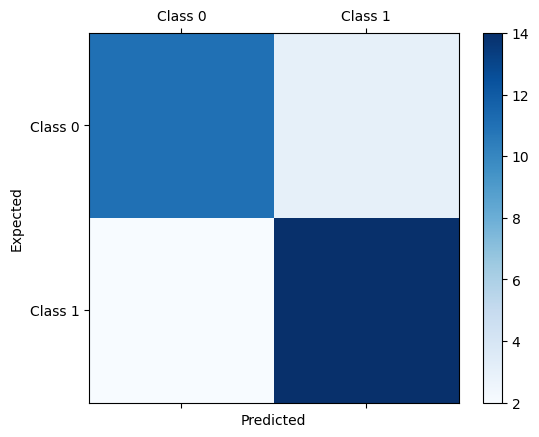

Accuracy 0.8333333333333334
              precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1       0.82      0.88      0.85        16

    accuracy                           0.83        30
   macro avg       0.83      0.83      0.83        30
weighted avg       0.83      0.83      0.83        30

AUC Score: 
0.8303571428571428


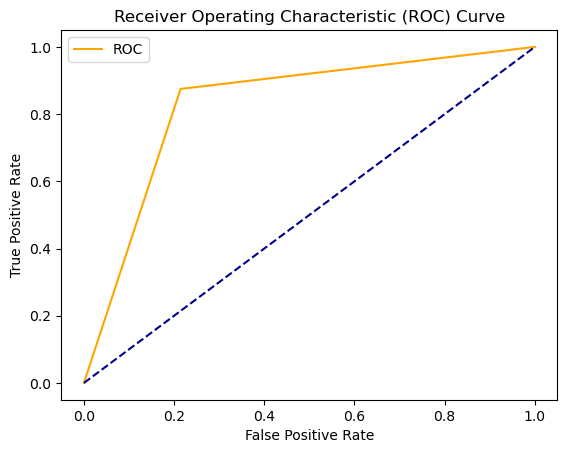

In [364]:
classif_results()

In [366]:
## boosting

Confusion matrix:
 [[10  4]
 [ 1 15]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/var/folders/g4/nw3tvq1j6q7c8jjlxwf19c5c0000gn/T/ipykernel_3292/1126036334.py:20: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/g4/nw3tvq1j6q7c8jjlxwf19c5c0000gn/T/ipykernel_3292/1126036334.py:21: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



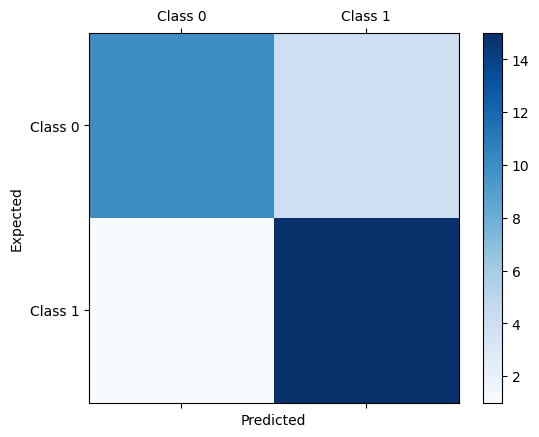

Accuracy 0.8333333333333334
              precision    recall  f1-score   support

           0       0.91      0.71      0.80        14
           1       0.79      0.94      0.86        16

    accuracy                           0.83        30
   macro avg       0.85      0.83      0.83        30
weighted avg       0.85      0.83      0.83        30

AUC Score: 
0.8258928571428571


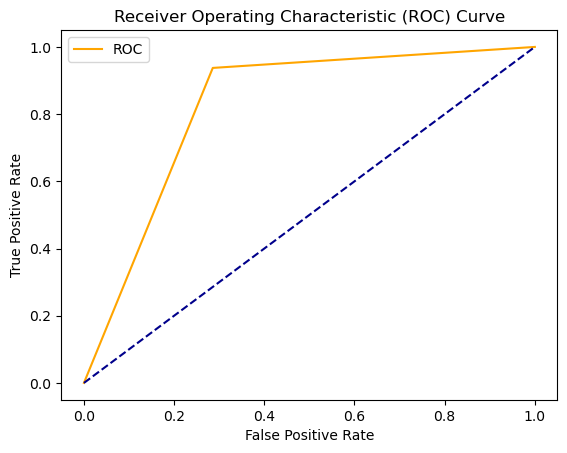

In [368]:
model = AdaBoostClassifier(
    DecisionTreeClassifier())
model.fit(X_train, y_train)

y_pred=model.predict(X_test)

classif_results()

Confusion matrix:
 [[11  3]
 [ 2 14]]


/var/folders/g4/nw3tvq1j6q7c8jjlxwf19c5c0000gn/T/ipykernel_3292/1126036334.py:20: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/g4/nw3tvq1j6q7c8jjlxwf19c5c0000gn/T/ipykernel_3292/1126036334.py:21: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



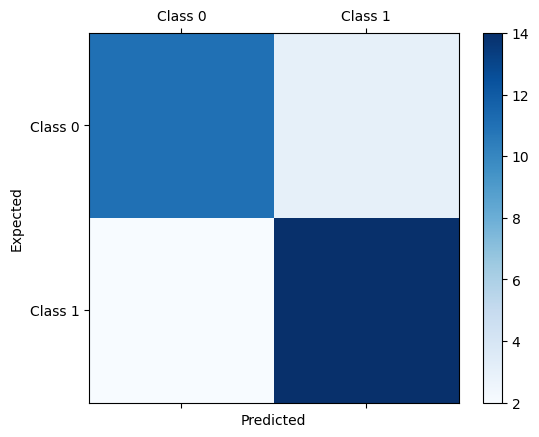

Accuracy 0.8333333333333334
              precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1       0.82      0.88      0.85        16

    accuracy                           0.83        30
   macro avg       0.83      0.83      0.83        30
weighted avg       0.83      0.83      0.83        30

AUC Score: 
0.8303571428571428


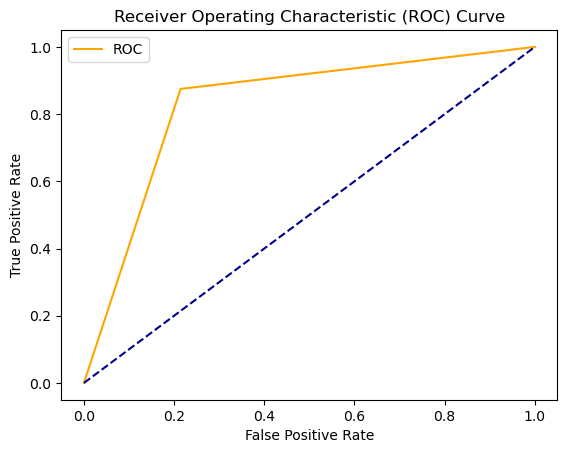

In [370]:

model = RandomForestClassifier()
model.fit(X_train, y_train) 

y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)


classif_results()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



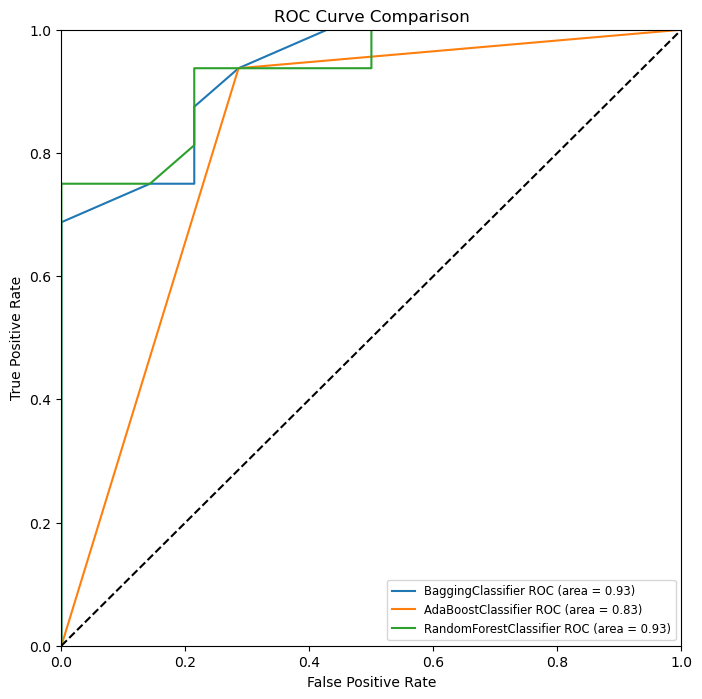

In [372]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define the models
models = [
    {
        'label': 'BaggingClassifier',
        'model': BaggingClassifier(DecisionTreeClassifier(), bootstrap=True)
    },
    {
        'label': 'AdaBoostClassifier',
        'model': AdaBoostClassifier(estimator=DecisionTreeClassifier())  # Use 'estimator' instead of 'base_estimator'
    },
    {
        'label': 'RandomForestClassifier',
        'model': RandomForestClassifier()
    }
]

# Assuming X_train, X_test, y_train, y_test are already defined
plt.figure(figsize=(8, 8))
for m in models:
    # Fit the model and plot the ROC curve
    probas = m['model'].fit(X_train, y_train).predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test, probas[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], roc_auc))

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right', fontsize='small')
plt.title('ROC Curve Comparison')
plt.show()


Bagging classifer performed really well giving us a auc score of 0.95 followed by random forest with 0.93.

## Linear regression

In [376]:
def linear(x,z):
  global X,y,predictions,residue
  X = df_reg[x].values.reshape(-1,1)
  y = df_reg[z].values.reshape(-1,1)
  

  #3 Feature Scaling
  from sklearn.preprocessing import StandardScaler
  sc_X = StandardScaler()
  sc_y = StandardScaler()

  X = sc_X.fit_transform(X)
  y = sc_X.fit_transform(y)

  from sklearn.linear_model import LinearRegression
  reg = LinearRegression()
  reg.fit(X, y)

  print("The linear model is: Y = {:.2} + {:.2}X".format(reg.intercept_[0], reg.coef_[0][0]))

  print("Regression Intercept : ",reg.intercept_[0])


  predictions = reg.predict(X)
  rms = mean_squared_error(y, predictions, squared=False)

  fig = px.scatter(
    df_reg, x=x, y=z, opacity=0.65,
    trendline='ols', trendline_color_override='darkblue')
  fig.show()

  # Plot the residuals after fitting a linear model
  sns.residplot(x=X, y=y, lowess=True, color="g")

  print("RMSE is: ", rms)
  x2 = sm.add_constant(X)

  est = sm.OLS(y, x2)
  #OLS is Ordinary Least Squares

  #est.TAB
  est2 = est.fit()
  print(est2.summary())

  residue = y - predictions

In [378]:
df_reg = df[['age','max_heart_rate_achieved']]
df_reg

,age,max_heart_rate_achieved
0,63,150
1,37,187
2,41,172
3,56,178
4,57,163
...,...,...
298,57,123
299,45,132
300,68,141
301,57,115


The linear model is: Y = -6.7e-16 + -0.4X
Regression Intercept :  -6.669593398676945e-16


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



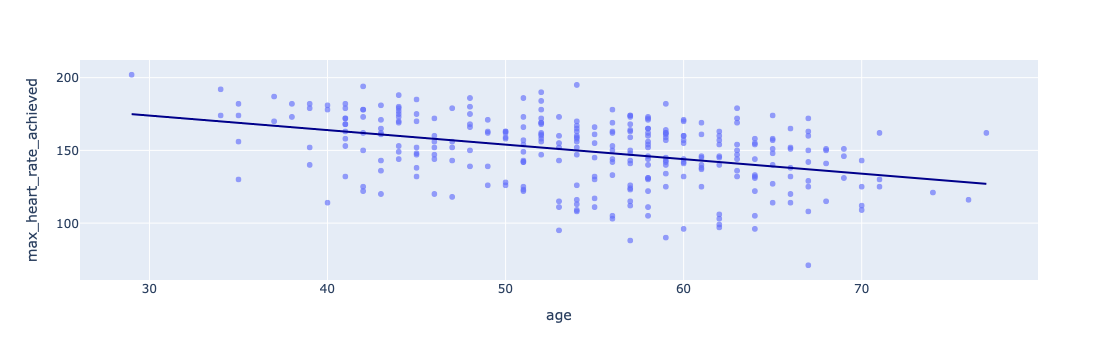

RMSE is:  0.9185799619627925
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     55.54
Date:                Fri, 20 Sep 2024   Prob (F-statistic):           9.86e-13
Time:                        17:43:02   Log-Likelihood:                -402.87
No. Observations:                 302   AIC:                             809.7
Df Residuals:                     300   BIC:                             817.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.468e-16  

,age,max_heart_rate_achieved,Predictions,Residue
0,63.0,150.0,-0.375392,0.394218
1,37.0,187.0,0.762230,0.874749
2,41.0,172.0,0.587211,0.393760
3,56.0,178.0,-0.069109,1.312483
4,57.0,163.0,-0.112864,0.700230


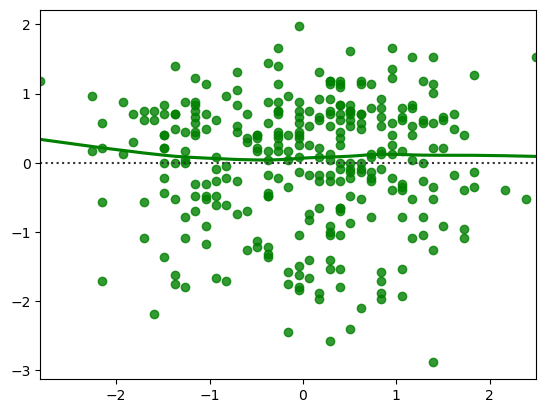

In [380]:
linear('age','max_heart_rate_achieved')
df_n = pd.DataFrame(predictions, columns = ['Predictions'])
df_reg_new = pd.concat([df_reg,df_n],axis = 1)
df_n = pd.DataFrame(residue, columns = ['Residue'])
df_reg_new = pd.concat([df_reg_new,df_n],axis = 1)
df_reg_new[['age','max_heart_rate_achieved','Predictions','Residue']].head()

In [382]:
## Multiple LR

In [384]:
df.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_1,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,fasting_blood_sugar_1,rest_ecg_1,rest_ecg_2,exercise_induced_angina_1,st_slope_1,st_slope_2,thalassemia_1,thalassemia_2,thalassemia_3
0,63,145,233,150,2.3,0,1,True,False,False,True,True,False,False,False,False,False,True,False,False
1,37,130,250,187,3.5,0,1,True,False,True,False,False,True,False,False,False,False,False,True,False
2,41,130,204,172,1.4,0,1,False,True,False,False,False,False,False,False,False,True,False,True,False
3,56,120,236,178,0.8,0,1,True,True,False,False,False,True,False,False,False,True,False,True,False
4,57,120,354,163,0.6,0,1,False,False,False,False,False,True,False,True,False,True,False,True,False


In [386]:
X = df.drop(df.iloc[:, 5:21],axis=1)
X = df.drop(['max_heart_rate_achieved'],axis=1)
y = df['max_heart_rate_achieved'].values.reshape(-1,1)


sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = sc_X.fit_transform(y)

In [388]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [390]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(211, 19)
(211, 1)
(91, 19)
(91, 1)


In [392]:
# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# print the intercept and coefficients
print("intercept is: ",linreg.intercept_)

print("coefficients are: ",linreg.coef_)

intercept is:  [-0.01085034]
coefficients are:  [[-0.27336058  0.06361407  0.13683682 -0.15568598  0.06204296  0.13403008
   0.00246508  0.10705378  0.06030499  0.11881891 -0.06324629  0.02120769
  -0.03197331 -0.15055525 -0.36580123 -0.19690177  0.3712291   0.99275924
   0.93020405]]


In [394]:
y_pred = linreg.predict(X_test)

In [396]:

my_pipeline = Pipeline(steps=[('model', LinearRegression())])



# Multiply by -1 since sklearn calculates *negative* scores
scores1 =  1 * cross_val_score(my_pipeline, X, y,
                              cv=10,
                              scoring='r2')
scores2 = -1 * cross_val_score(my_pipeline, X, y,
                              cv=10,
                              scoring='neg_mean_absolute_error')
scores3 = -1 * cross_val_score(my_pipeline, X, y,
                              cv=10,
                              scoring='neg_root_mean_squared_error')

print("R squared scores:\n", scores1)
print("Average R squared score (across experiments):",scores1.mean())


print("RMSE scores:\n", scores3)
print("Average RMSE score (across experiments):",scores3.mean())

R squared scores:
 [ 0.20356544 -0.28647009  0.1016577   0.35320908  0.32391261  0.47087356
 -0.02545362  0.12161963  0.02308072 -0.19277621]
Average R squared score (across experiments): 0.10932188160385148
RMSE scores:
 [0.63527052 0.89877049 0.75175291 0.68096184 0.82488396 0.67856774
 0.78925967 0.90097583 1.20368512 0.96096607]
Average RMSE score (across experiments): 0.8325094130982688


In [398]:
x2 = sm.add_constant(X)
est = sm.OLS(y, x2)
#OLS is Ordinary Least Squares
#est.TAB
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     10.84
Date:                Fri, 20 Sep 2024   Prob (F-statistic):           3.94e-24
Time:                        17:43:07   Log-Likelihood:                -345.74
No. Observations:                 302   AIC:                             731.5
Df Residuals:                     282   BIC:                             805.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.468e-16      0.045  -1.21e-14      1.0

We have R2 of 0.4 which indicates that the model good enough and not weak compared to that of simple linear regression.


## Students t test

Here, I conducted a t-test to determine whether the maximum heart rate achieved in a sample differs significantly from the overall average maximum heart rate achieved in cases of heart disease.

Null Hypothesis: The average maximum heart rate achieved remains the same between the overall data and a sample.

Alternative Hypothesis: The average maximum heart rate achieved is different in a sample compared to the overall data.

In [403]:
# Necessary imports
import warnings
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import numpy as np

# Setup inline plotting for Jupyter Notebooks
%matplotlib inline

# Ignore warnings
warnings.filterwarnings("ignore")

# Set figure and font size
rcParams['figure.figsize'] = 8, 8
rcParams['font.size'] = 30

# Set the Seaborn style
sns.set()

# Set the random seed for reproducibility
np.random.seed(8)


In [405]:
def plot_distribution(inp):
    plt.figure()
    ax = sns.distplot(inp)
    ax.set_xlim([30, 365])
    plt.axvline(np.mean(inp), color="k", linestyle="dashed", linewidth=3)
    _, max_ = plt.ylim()
    plt.text(
        inp.mean() + inp.mean() / 10,
        max_ - max_ / 10,
        "Mean: {:.2f}".format(inp.mean()),
    )
    return plt.figure

In [407]:
df.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_1,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,fasting_blood_sugar_1,rest_ecg_1,rest_ecg_2,exercise_induced_angina_1,st_slope_1,st_slope_2,thalassemia_1,thalassemia_2,thalassemia_3
0,63,145,233,150,2.3,0,1,True,False,False,True,True,False,False,False,False,False,True,False,False
1,37,130,250,187,3.5,0,1,True,False,True,False,False,True,False,False,False,False,False,True,False
2,41,130,204,172,1.4,0,1,False,True,False,False,False,False,False,False,False,True,False,True,False
3,56,120,236,178,0.8,0,1,True,True,False,False,False,True,False,False,False,True,False,True,False
4,57,120,354,163,0.6,0,1,False,False,False,False,False,True,False,True,False,True,False,True,False


In [409]:
df_hyp = df[['max_heart_rate_achieved']]
df_hyp.head()

,max_heart_rate_achieved
0,150
1,187
2,172
3,178
4,163


<function matplotlib.pyplot.figure(num: 'int | str | Figure | SubFigure | None' = None, figsize: 'tuple[float, float] | None' = None, dpi: 'float | None' = None, *, facecolor: 'ColorType | None' = None, edgecolor: 'ColorType | None' = None, frameon: 'bool' = True, FigureClass: 'type[Figure]' = <class 'matplotlib.figure.Figure'>, clear: 'bool' = False, **kwargs) -> 'Figure'>

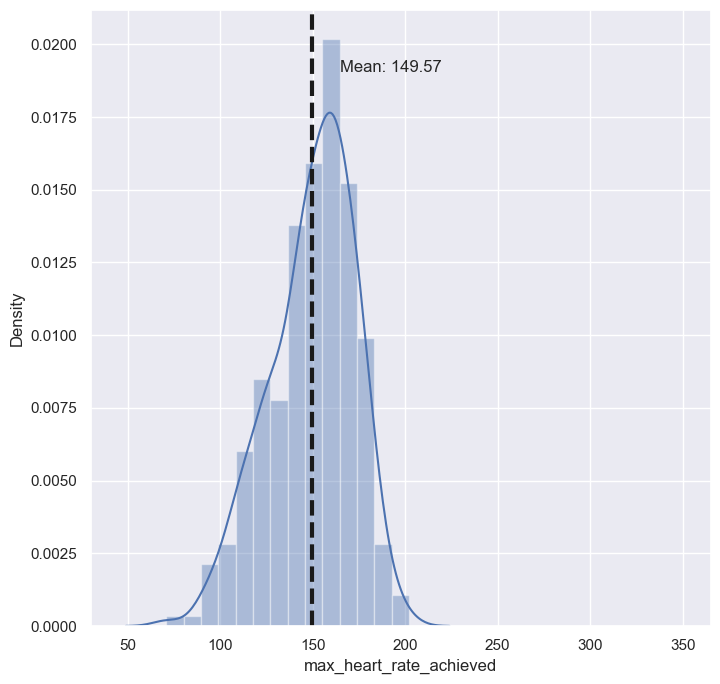

In [411]:
plot_distribution(df_hyp['max_heart_rate_achieved'])

In [413]:
sample_size = 30
avail_sample=np.random.choice(df_hyp['max_heart_rate_achieved'],sample_size)
avail_sample

array([153,  96, 113, 115, 160, 170, 131, 162, 144, 156, 142, 171, 145,
       179, 117, 151, 168, 174, 152, 170,  71, 132, 151, 140, 161, 132,
       179, 141, 157, 126])

In [415]:
np.mean(avail_sample)

145.3

<function matplotlib.pyplot.figure(num: 'int | str | Figure | SubFigure | None' = None, figsize: 'tuple[float, float] | None' = None, dpi: 'float | None' = None, *, facecolor: 'ColorType | None' = None, edgecolor: 'ColorType | None' = None, frameon: 'bool' = True, FigureClass: 'type[Figure]' = <class 'matplotlib.figure.Figure'>, clear: 'bool' = False, **kwargs) -> 'Figure'>

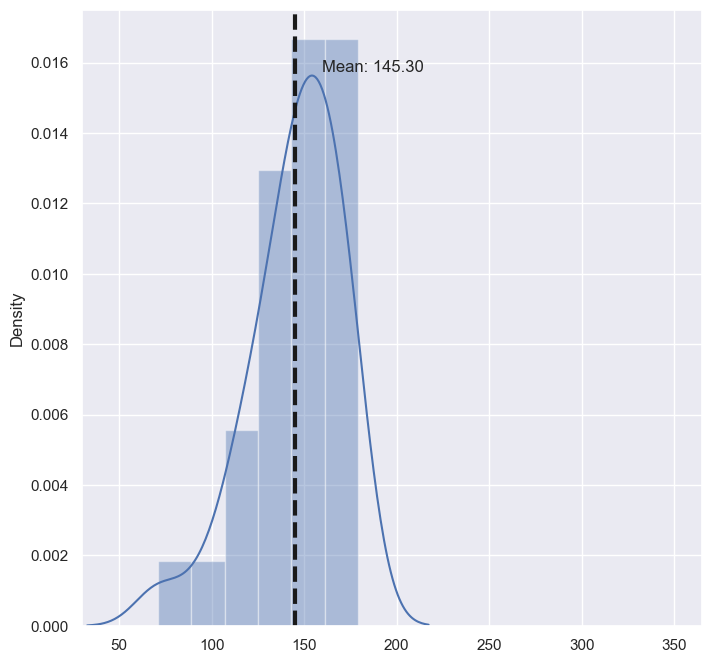

In [417]:
plot_distribution(avail_sample)

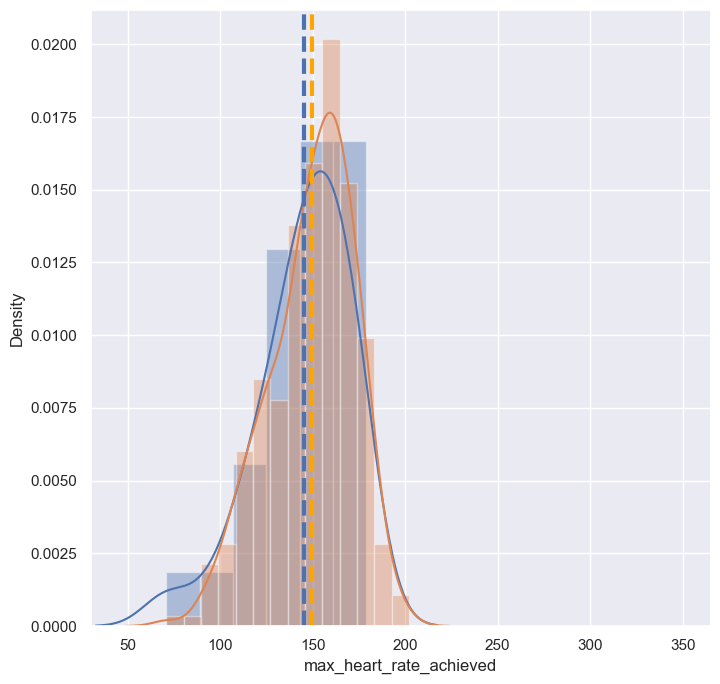

In [419]:
plt.figure()
ax1 = sns.distplot(avail_sample)
ax2 = sns.distplot(df_hyp['max_heart_rate_achieved'])
ax1.set_xlim([30, 365])
ax2.set_xlim([30, 365])
plt.axvline(np.mean(avail_sample), color='b', linestyle='dashed', linewidth=3)
plt.axvline(np.mean(df_hyp['max_heart_rate_achieved']), color='orange', linestyle='dashed', linewidth=3)

In [421]:
def compare_2_groups(arr_1, arr_2, alpha):
    stat, p = ttest_ind(arr_1, arr_2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Same distributions hence we fail to reject H0(Null Hypothesis)')
    else:
        print('Different distributions hence we reject H0(Null Hypothesis)')

compare_2_groups(df_hyp['max_heart_rate_achieved'], avail_sample, 0.05)

Statistics=0.965, p=0.335
Same distributions hence we fail to reject H0(Null Hypothesis)


Here we fail to reject H0 and hence we accept the null hypothesis itself that the average max_heart_rate_achieved be same even if we take a sample of max_heart_rate_achieved data.